In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

from IPython.display import Audio, display  # For audio playback

# Define base path and audio path
base_path = '/kaggle/input/librispeech-clean/LibriSpeech/'
train_c100_audio_path = base_path + 'train-clean-100'

# Collect all file IDs and paths
tc100_walkers = []
tc100_walker = [(str(p.stem), train_c100_audio_path) for p in Path(train_c100_audio_path).glob('*/*/*' + ".flac")]
tc100_walkers.extend(tc100_walker)
tc100_walkers = sorted(tc100_walkers)

# Function to find transcript for a given file_id
def find_sentence(file_id):
    speaker_id, chapter_id, utterance_id = file_id.split('-')
    file_text = f"{speaker_id}-{chapter_id}.trans.txt"
    file_text_path = os.path.join(train_c100_audio_path, speaker_id, chapter_id, file_text)
    
    with open(file_text_path, 'r') as ft:
        for line in ft:
            fileid_text, transcript = line.strip().split(" ", 1)
            if fileid_text == file_id:
                return transcript
    raise FileNotFoundError(f"Transcript not found for {file_id}")

# Create a DataFrame with file information
df = pd.DataFrame()
df['file_id'] = [s[0] for s in tc100_walkers]
df['speaker_id'] = [file_id.split('-')[0] for file_id in df['file_id']]
df['chapter_id'] = [file_id.split('-')[1] for file_id in df['file_id']]
df['utterance_id'] = [file_id.split('-')[2] for file_id in df['file_id']]
df['audio_path'] = df['file_id'].apply(
    lambda x: os.path.join(train_c100_audio_path, x.split('-')[0], x.split('-')[1], x + ".flac")
)
df['sentence'] = df['file_id'].apply(find_sentence)



In [2]:
df.head

<bound method NDFrame.head of                file_id speaker_id chapter_id utterance_id  \
0        103-1240-0000        103       1240         0000   
1        103-1240-0001        103       1240         0001   
2        103-1240-0002        103       1240         0002   
3        103-1240-0003        103       1240         0003   
4        103-1240-0004        103       1240         0004   
...                ...        ...        ...          ...   
28534  911-130578-0016        911     130578         0016   
28535  911-130578-0017        911     130578         0017   
28536  911-130578-0018        911     130578         0018   
28537  911-130578-0019        911     130578         0019   
28538  911-130578-0020        911     130578         0020   

                                              audio_path  \
0      /kaggle/input/librispeech-clean/LibriSpeech/tr...   
1      /kaggle/input/librispeech-clean/LibriSpeech/tr...   
2      /kaggle/input/librispeech-clean/LibriSpeech/tr... 

In [3]:
# Function to display audio and transcription
def display_audio_and_transcription_random(df):
    """Play audio and display transcription for a random audio file."""
    # Select a random row
    random_row = df.sample(n=1).iloc[0]
    file_id = random_row['file_id']
    audio_path = random_row['audio_path']
    transcript = random_row['sentence']

    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=None)

    # Display the audio player and transcription
    print(f"Transcription for {file_id}: {transcript}\n")
    display(Audio(audio, rate=sr))

# Example usage: Play audio and transcription for a random file
display_audio_and_transcription_random(df)


Transcription for 4018-103416-0033: SHE WAS HOLDING OUT BOTH HANDS TO HIM PITEOUSLY YOU WOULDN'T GO WOULD YOU I MIGHT HAVE TO GO HE EVADED YOU WOULDN'T GRAHAM YOU'RE ALL I HAVE ALL I HAVE LEFT TO LIVE FOR YOU WOULDN'T NEED TO GO IT'S RIDICULOUS YOU'RE NEEDED HERE



A spectrogram converts an audio signal into a 2D array where one dimension represents time, the other represents frequency, and the values represent the intensity/magnitude at each time-frequency point.

100%|██████████| 7000/7000 [08:24<00:00, 13.89it/s]


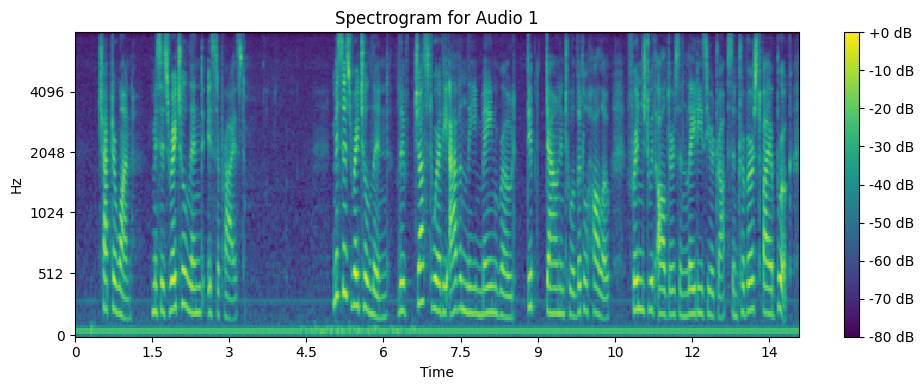

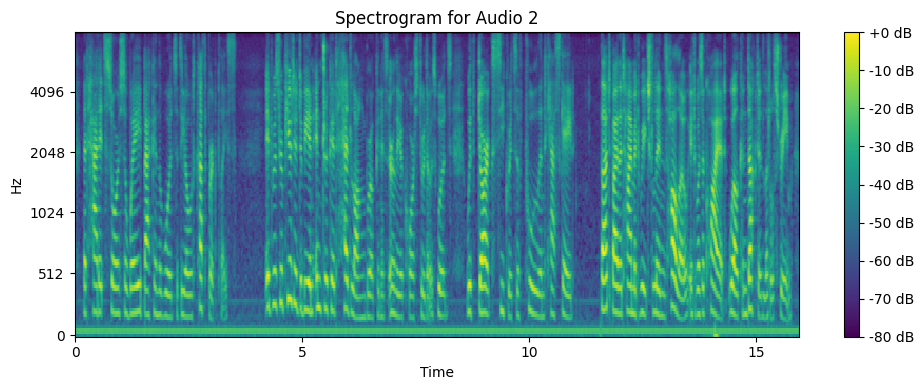

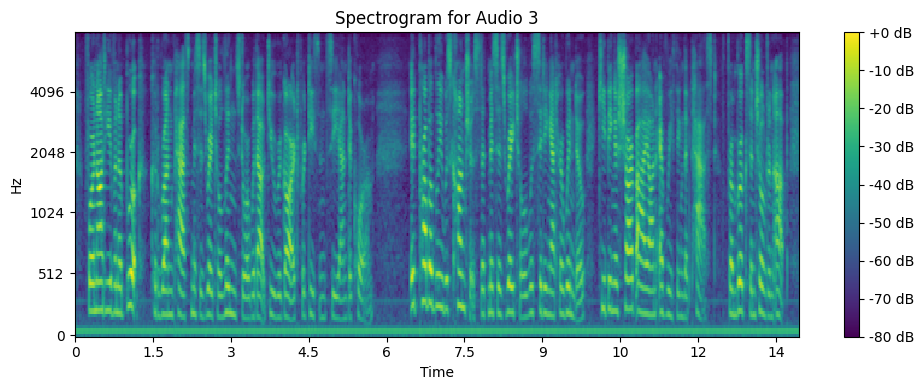

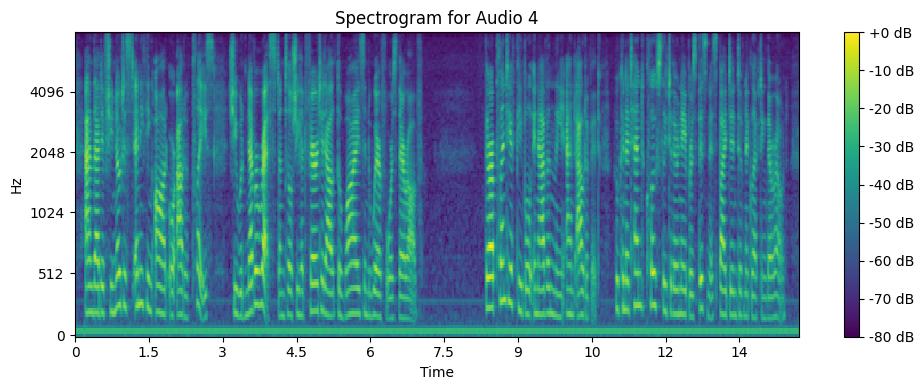

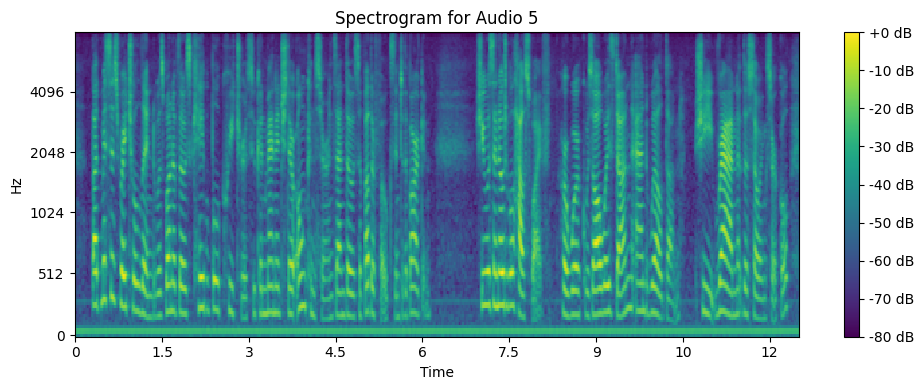

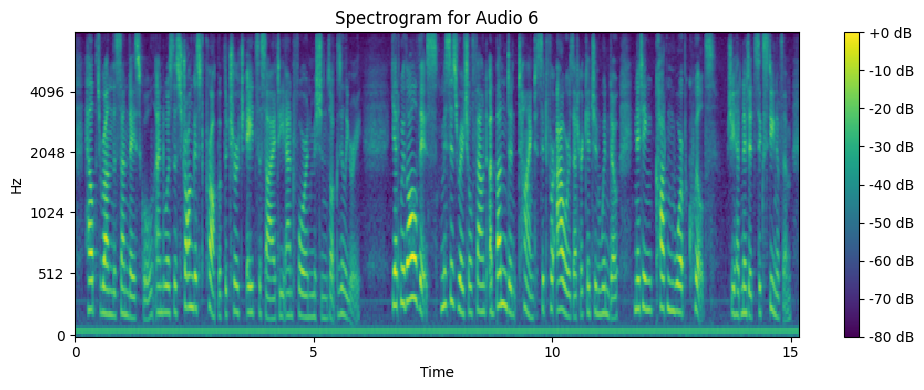

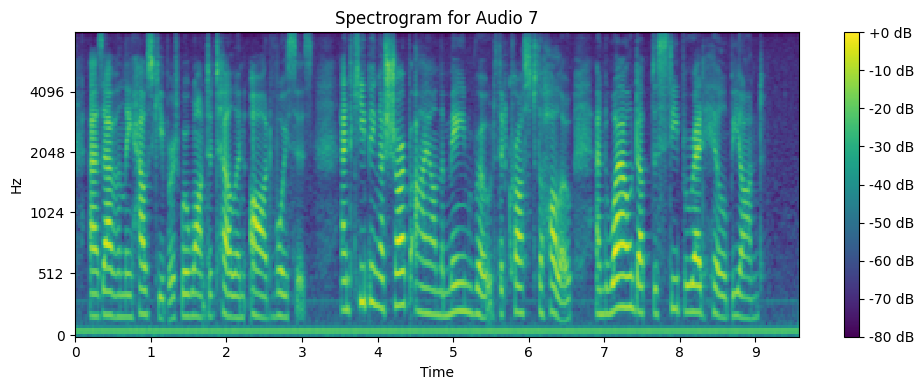

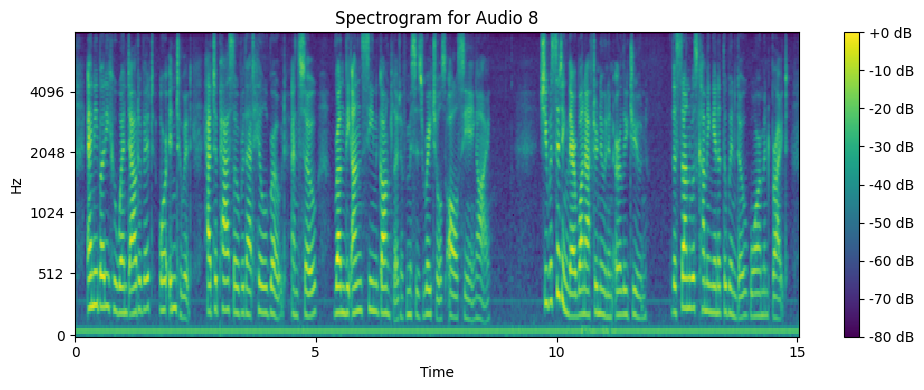

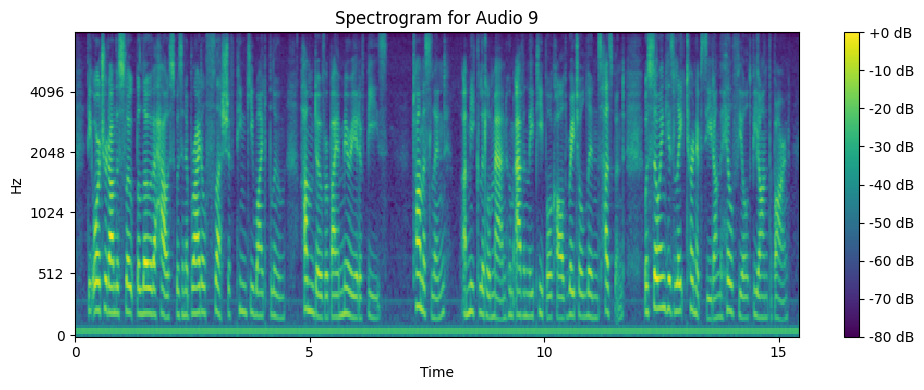

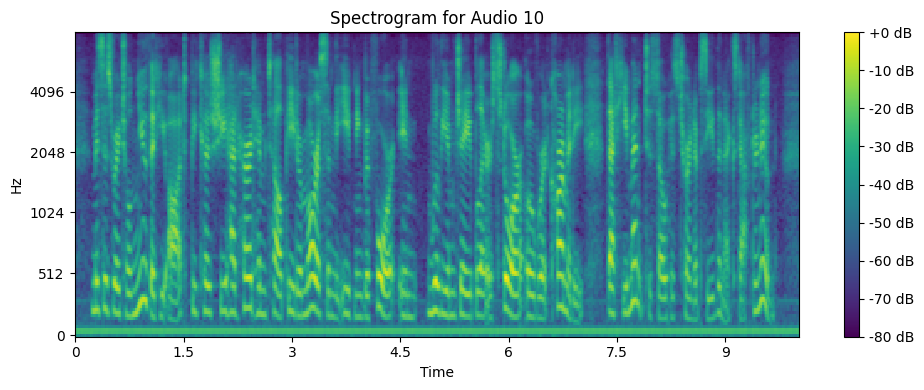

                                         spectrogram  \
0  [[-38.399334, -41.834297, -42.82463, -42.71394...   
1  [[-36.363213, -38.257984, -40.797043, -41.5993...   
2  [[-38.4584, -43.480667, -44.40672, -43.541035,...   
3  [[-39.422295, -41.115063, -42.395966, -44.5582...   
4  [[-37.08145, -41.186386, -45.844105, -45.89755...   
5  [[-37.20435, -42.232697, -48.03568, -48.483604...   
6  [[-34.919975, -39.26729, -43.671314, -43.53902...   
7  [[-32.722736, -37.092674, -40.411987, -38.7806...   
8  [[-35.256657, -38.714794, -41.099297, -41.9778...   
9  [[-35.383728, -37.56189, -38.70811, -46.028946...   

                                            sentence  
0  CHAPTER ONE MISSUS RACHEL LYNDE IS SURPRISED M...  
1  THAT HAD ITS SOURCE AWAY BACK IN THE WOODS OF ...  
2  FOR NOT EVEN A BROOK COULD RUN PAST MISSUS RAC...  
3  AND THAT IF SHE NOTICED ANYTHING ODD OR OUT OF...  
4  BUT MISSUS RACHEL LYNDE WAS ONE OF THOSE CAPAB...  
5  HELPED RUN THE SUNDAY SCHOOL AND WAS THE STRON... 

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

# Generate Mel spectrogram for an audio file
def generate_spectrogram(audio_path, target_sr=22050):
    audio, sr = librosa.load(audio_path, sr=None)
    audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=target_sr)
    spectrogram = librosa.feature.melspectrogram(y=audio_resampled, sr=target_sr, n_mels=128, fmax=8000)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    return spectrogram_db

# Plot a single spectrogram
def plot_spectrogram(spectrogram, title="Spectrogram"):
       plt.figure(figsize=(10, 4))
       librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel', sr=22050, fmax=8000, cmap='viridis')  
       plt.colorbar(format='%+2.0f dB')    
       plt.title(title)
       plt.tight_layout()
       plt.show()

# Generate spectrograms for the first 10 audio files
spectrograms = []
for audio_path in tqdm(df['audio_path'][:7000]):
    spectrogram = generate_spectrogram(audio_path)
    spectrograms.append(spectrogram)

# Add spectrograms to the DataFrame
df['spectrogram'] = [None] * len(df)  # Initialize the column
df = df.astype({'spectrogram': 'object'})  # Ensure the column can store objects

for i, spectrogram in enumerate(spectrograms[:10]):
    df.at[i, 'spectrogram'] = spectrogram
    plot_spectrogram(spectrogram, title=f"Spectrogram for Audio {i+1}")

# Save the DataFrame
df_output = df[['spectrogram', 'sentence']]
df_output.to_pickle("spectrograms_with_transcripts.pkl")  # Save to a pickle file for easy loading
print(df_output.head(10))


In [5]:
df_output.sample

<bound method NDFrame.sample of                                              spectrogram  \
0      [[-38.399334, -41.834297, -42.82463, -42.71394...   
1      [[-36.363213, -38.257984, -40.797043, -41.5993...   
2      [[-38.4584, -43.480667, -44.40672, -43.541035,...   
3      [[-39.422295, -41.115063, -42.395966, -44.5582...   
4      [[-37.08145, -41.186386, -45.844105, -45.89755...   
...                                                  ...   
28534                                               None   
28535                                               None   
28536                                               None   
28537                                               None   
28538                                               None   

                                                sentence  
0      CHAPTER ONE MISSUS RACHEL LYNDE IS SURPRISED M...  
1      THAT HAD ITS SOURCE AWAY BACK IN THE WOODS OF ...  
2      FOR NOT EVEN A BROOK COULD RUN PAST MISSUS RAC...  
3      AND 

In [6]:
# Assign spectrograms as objects to avoid shape mismatch
df['spectrogram'] = pd.Series(spectrograms, dtype=object)


# Normalize spectrograms
def normalize_spectrogram(spectrogram):
    return (spectrogram - np.mean(spectrogram)) / np.std(spectrogram)

df['spectrogram'] = df['spectrogram'].apply(lambda x: normalize_spectrogram(x) if x is not None else None)

# One-hot encode text
def one_hot_encode_text(text, char_to_idx):
    one_hot = np.zeros((len(text), len(char_to_idx)), dtype=np.float32)
    for i, char in enumerate(text):
        if char in char_to_idx:
            one_hot[i, char_to_idx[char]] = 1.0
    return one_hot

# Create character-to-index mapping
unique_chars = set(''.join(df['sentence']))
char_to_idx = {char: idx for idx, char in enumerate(sorted(unique_chars))}
df['one_hot_sentence'] = df['sentence'].apply(lambda x: one_hot_encode_text(x, char_to_idx))

# Save DataFrame with normalized spectrograms and one-hot encoded text
df_output = df[['spectrogram', 'one_hot_sentence']]
print(df_output.head(10))

                                         spectrogram  \
0  [[0.9142637, 0.65988886, 0.5865501, 0.594747, ...   
1  [[0.7873121, 0.6429213, 0.4494328, 0.38829195,...   
2  [[0.84373444, 0.4644093, 0.3944658, 0.4598498,...   
3  [[0.8179947, 0.6936144, 0.5994969, 0.44061542,...   
4  [[0.9287215, 0.62030613, 0.27035856, 0.2663428...   
5  [[1.0362395, 0.64554465, 0.19466174, 0.1598586...   
6  [[0.890709, 0.5661778, 0.23741293, 0.2472885, ...   
7  [[1.0877758, 0.7679593, 0.5250334, 0.6444257, ...   
8  [[1.0436617, 0.7812709, 0.60034364, 0.53368264...   
9  [[0.8709027, 0.7059279, 0.6191127, 0.06462972,...   

                                    one_hot_sentence  
0  [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...  
3  [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4  [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
5  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,... 

In [7]:
# Get the number of rows and columns using shape
num_rows, num_columns = df_output.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 28539
Number of columns: 2


In [8]:
print(df_output.columns)


Index(['spectrogram', 'one_hot_sentence'], dtype='object')


In [9]:
df_output.shape

(28539, 2)

In [10]:
X = df_output['spectrogram'].tolist()  # Convert the spectrogram column to a list
y = df_output['one_hot_sentence'].tolist()  # Convert the one_hot_sentence column to a list


In [11]:
X[0].shape
#his gives the height and width of the first spectrogram. Since spectrograms represent audio signals, their shapes will likely vary depending on the duration and sampling rate of the audio.

(128, 607)

In [12]:
y[0].shape   
# This represents the structure of the one-hot encoded sentence corresponding to the first spectrogram. Typically:

# If y[0] is one-hot encoded for each word in the sentence, its shape will be (num_words, num_classes), where:

# num_words is the number of words in the sentence.
# num_classes is the size of the vocabulary

(201, 28)

Both your spectrograms (input data) and one-hot encoded sentences (output data) must have a fixed size to allow batch processing during training. This is why padding and preprocessing are crucial steps.

In [13]:
# Check the first few items in X and y
print("First 5 items in X:", X[:5])
print("First 5 items in y:", y[:5])



First 5 items in X: [array([[ 0.9142637 ,  0.65988886,  0.5865501 , ...,  0.63269186,
         0.549507  ,  0.8048375 ],
       [ 1.5920147 ,  1.8656577 ,  1.8920989 , ...,  1.8688353 ,
         1.8939924 ,  1.8326579 ],
       [ 1.6592101 ,  1.9506571 ,  1.9862239 , ...,  1.9664018 ,
         1.9783356 ,  1.8928554 ],
       ...,
       [-1.6825143 , -1.5879529 , -1.5669311 , ..., -1.15213   ,
        -0.889445  , -0.9912667 ],
       [-1.7142075 , -1.8799886 , -2.0203714 , ..., -1.5272354 ,
        -1.2839832 , -1.2279547 ],
       [-1.9660232 , -2.166457  , -2.166457  , ..., -2.166457  ,
        -2.166457  , -1.7900504 ]], dtype=float32), array([[ 0.7873121 ,  0.6429213 ,  0.4494328 , ...,  0.2139357 ,
         0.35334244,  0.607182  ],
       [ 1.3946698 ,  1.6922448 ,  1.7285835 , ...,  1.751304  ,
         1.7640672 ,  1.6550264 ],
       [ 1.4571898 ,  1.7859347 ,  1.7989916 , ...,  1.8032131 ,
         1.8338495 ,  1.7296052 ],
       ...,
       [-1.4744604 , -1.3914996 , -1.5

Thi following code filters and validates  spectrogram-sentence pairs by:

Checking spectrograms are 2D numpy arrays
Verifying sentences are non-empty lists/arrays
Creating clean lists of valid X (spectrograms) and y (sentences)

In [14]:
# Filter X and y for valid spectrograms and sentences
valid_data = [(spectrogram, sentence) for spectrogram, sentence in zip(X, y)
              if isinstance(spectrogram, np.ndarray) and spectrogram.ndim == 2
              and isinstance(sentence, (list, np.ndarray)) and len(sentence) > 0]

# # Unpack filtered data
X, y = zip(*valid_data)
X, y = list(X), list(y)  # Convert back to lists


In [15]:
# Check the number of non-empty entries in X and y
valid_X = [x for x in X if x is not None and len(x) > 0]
valid_y = [sentence for sentence in y if sentence is not None and len(sentence) > 0]

print(f"Original X length: {len(X)}")
print(f"Filtered X length: {len(valid_X)}")

print(f"Original y length: {len(y)}")
print(f"Filtered y length: {len(valid_y)}")


Original X length: 7000
Filtered X length: 7000
Original y length: 7000
Filtered y length: 7000


In [16]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")


Length of X: 7000
Length of y: 7000


In [17]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Spectrogram padding
max_height = max([spectrogram.shape[0] for spectrogram in X])
max_width = max([spectrogram.shape[1] for spectrogram in X])

def pad_spectrogram(spectrogram, max_height, max_width):
    padded_spectrogram = np.zeros((max_height, max_width))
    padded_spectrogram[:spectrogram.shape[0], :spectrogram.shape[1]] = spectrogram
    return padded_spectrogram

X_padded = np.array([pad_spectrogram(spectrogram, max_height, max_width) for spectrogram in X])

# Sentence padding
max_sentence_length = max([len(sentence) for sentence in y])

y_padded = pad_sequences(
    y,
    maxlen=max_sentence_length,
    padding='post',
    truncating='post',
    value=0
)


In [18]:
print("Shape of X_padded:", X_padded.shape)
print("Shape of y_padded:", y_padded.shape)


Shape of X_padded: (7000, 128, 744)
Shape of y_padded: (7000, 338, 28)


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split into training and temp (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_padded, y_padded, test_size=0.2, random_state=42)

# Split temp set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print sizes for verification
print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")
print(f"Test data size: {len(X_test)}")


Training data size: 5600
Validation data size: 700
Test data size: 700


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed, Bidirectional, BatchNormalization, Dropout,Reshape
from tensorflow.keras.optimizers import Adam

# Define input shapes
spectrogram_shape = X_padded[0].shape
output_sequence_length, num_characters = y_padded.shape[1], y_padded.shape[2]

# Define the CNN model
# Add channel dimension to X_padded
X_padded = np.expand_dims(X_padded, axis=-1)  # Shape becomes (num_samples, 128, 743, 1)

# Update input shape
spectrogram_shape = X_padded.shape[1:]  # (128, 743, 1)
inputs = Input(shape=spectrogram_shape, name="input_spectrogram")

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)


x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten and reshape for RNN
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(output_sequence_length * num_characters, activation='relu')(x)
x = Reshape((output_sequence_length, num_characters))(x)


# LSTM layer for sequence modeling
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(0.3)(x)

# Fully connected layer for character prediction
outputs = TimeDistributed(Dense(num_characters, activation='softmax'))(x)

# Compile the model
model = Model(inputs, outputs)
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    x=X_train, y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=50
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_spectrogram (InputLayer)       │ (None, 128, 744, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 744, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 744, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 372, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 372, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 372, 64)         │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 186, 64)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 186, 128)        │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 186, 128)        │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 93, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 190464)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      97,518,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9464)                │       4,855,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 338, 28)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 338, 512)            │         583,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 338, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 338, 28)             │          14,364 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,064,724 (393.16 MB)

 Trainable params: 103,064,276 (393.16 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 102s 439ms/step - accuracy: 0.4263 - loss: 1.6080 - val_accuracy: 0.5614 - val_loss: 1.5323
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 76s 433ms/step - accuracy: 0.5578 - loss: 1.5375 - val_accuracy: 0.5567 - val_loss: 1.5328
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 76s 435ms/step - accuracy: 0.5509 - loss: 1.5314 - val_accuracy: 0.5489 - val_loss: 1.5340
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 76s 435ms/step - accuracy: 0.5468 - loss: 1.5452 - val_accuracy: 0.5543 - val_loss: 1.5332
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 76s 436ms/step - accuracy: 0.5458 - loss: 1.5584 - val_accuracy: 0.5453 - val_loss: 1.5351
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 76s 435ms/step - accuracy: 0.5553 - loss: 1.5291 - val_accuracy: 0.5537 - val_loss: 1.5339
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 76s 435ms/step - accuracy: 0.5482 - loss: 1.5552 - val_accuracy: 0.5615 - val_loss: 1.5341
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 76s 435ms/step - accuracy: 0.5546 - loss: 

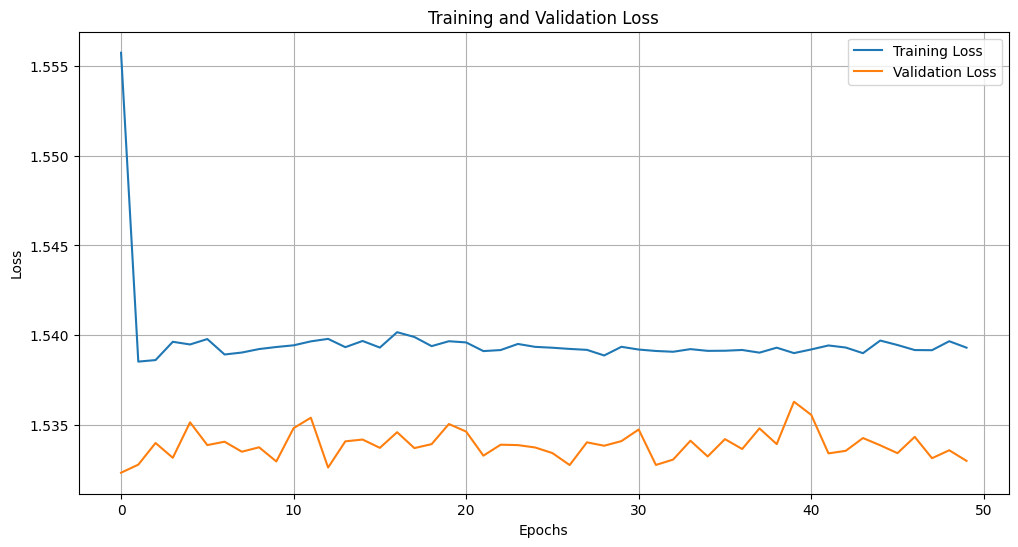

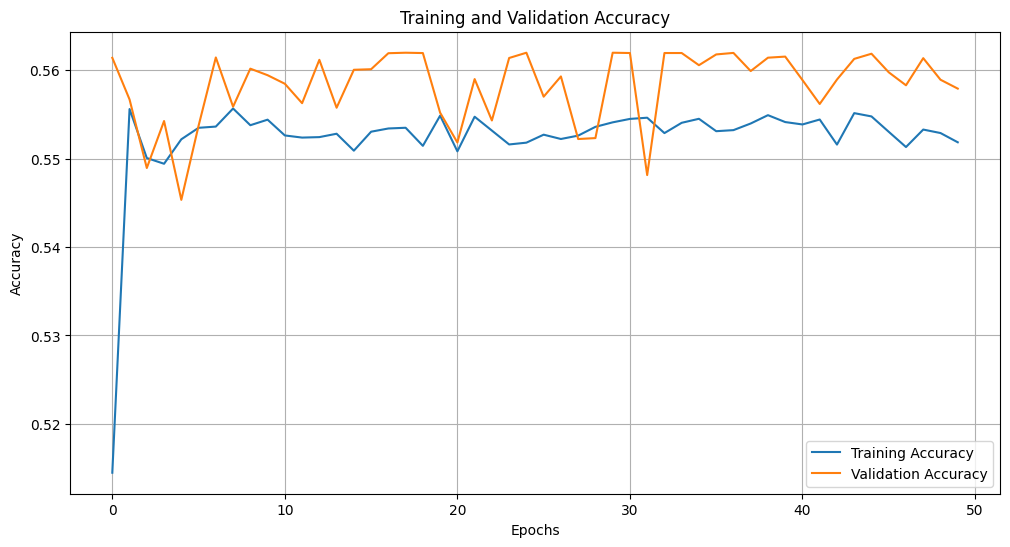

In [21]:
import matplotlib.pyplot as plt

# Check if 'history' variable exists and contains required data
if 'history' in globals():
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Training history not found. Make sure the model has been trained and the 'history' variable exists.")


In [22]:
# Save the entire model to a file
model.save('subtitle_generator_model.h5')  # Save as a .h5 file
print("Model saved successfully as 'subtitle_generator_model.h5'")


Model saved successfully as 'subtitle_generator_model.h5'


In [23]:
!pip install jiwer

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.4 MB/s eta 0:00:00


In [24]:
import numpy as np
from tensorflow.keras.models import load_model
from jiwer import wer

# Function to decode one-hot encoded sequences
def decode_one_hot(one_hot_seq, idx_to_char):
    decoded_text = []
    for char_vector in one_hot_seq:
        char_index = np.argmax(char_vector)
        decoded_text.append(idx_to_char[char_index])
    return ''.join(decoded_text)

# Load the saved model (if not already loaded)
model = load_model("subtitle_generator_model.h5")

# Create reverse mapping from indices to characters
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

# Predict on test set
predicted_texts = []
ground_truth_texts = []

print("Generating predictions on test set...")
for i in range(len(X_test)):
    # Predict using the model
    predicted_one_hot = model.predict(X_test[i:i+1])  # Predict single sample
    predicted_text = decode_one_hot(predicted_one_hot[0], idx_to_char)  # Decode predicted text
    predicted_texts.append(predicted_text)

    # Decode ground truth text
    ground_truth_text = decode_one_hot(y_test[i], idx_to_char)
    ground_truth_texts.append(ground_truth_text)

# Print some predictions vs ground truth
print("\nSample Predictions vs Ground Truth:")
for i in range(10):  # Print first 5 samples
    print(f"Ground Truth: {ground_truth_texts[i]}")
    print(f"Prediction:  {predicted_texts[i]}")
    print()

# Calculate Word Error Rate (WER)
wer_score = wer(ground_truth_texts, predicted_texts)
print(f"Word Error Rate (WER): {wer_score:.2f}")


Generating predictions on test set...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━

In [25]:
predicted_one_hot = model.predict(X_test[i:i+1])  # Shape: (1, output_sequence_length, num_characters)
print(predicted_one_hot[0])  # Raw probabilities


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[9.63803753e-02 1.00248028e-03 1.19677901e-01 ... 9.42473649e-04
  1.94142926e-02 1.83888711e-04]
 [1.52853325e-01 5.16332919e-03 6.38438091e-02 ... 9.88135464e-04
  7.07672816e-03 1.80981340e-04]
 [2.10989878e-01 4.46059369e-03 6.28067106e-02 ... 9.16978985e-04
  1.22024445e-02 1.95678891e-04]
 ...
 [1.72377020e-01 2.14156881e-03 6.67996258e-02 ... 9.62397200e-04
  2.14736108e-02 1.57061033e-04]
 [1.96815446e-01 4.78724251e-03 6.82222769e-02 ... 1.18970114e-03
  1.37943728e-02 3.94263159e-04]
 [1.86916053e-01 2.60813022e-03 8.05877224e-02 ... 1.52125082e-03
  1.32033043e-02 7.14256370e-04]]


In [26]:
predictions = model.predict(X_test)
print(predictions[0])  # Raw probabilities for the first sample


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step
[[9.9441864e-02 9.1855088e-04 1.2136853e-01 ... 9.3245244e-04
  1.9586692e-02 1.3989449e-04]
 [1.5285333e-01 5.1633292e-03 6.3843809e-02 ... 9.8813546e-04
  7.0767282e-03 1.8098134e-04]
 [2.1106717e-01 4.4711786e-03 6.2808953e-02 ... 9.1581192e-04
  1.2221284e-02 1.9509773e-04]
 ...
 [1.7008458e-01 2.3259425e-03 7.0807688e-02 ... 9.1682147e-04
  2.0314189e-02 2.1548645e-04]
 [1.9197586e-01 5.0135292e-03 6.7470685e-02 ... 1.0873014e-03
  1.3142985e-02 4.7298439e-04]
 [1.8194845e-01 2.5669613e-03 7.8615725e-02 ... 1.4444789e-03
  1.2698808e-02 7.9451309e-04]]


In [27]:
from collections import Counter
char_counts = Counter(''.join("AND WITH JOINT FORCES THEY ATTACKED BLAKE ON OCTOBER EIGHTH NEAR THE SHOAL KNOWN AS THE KENTISH KNOCK THE ENGLISH FLEET WAS CONSIDERABLY MORE POWERFUL THAN THE DUTCH AND THE DESERTION OF DE WITH BY SOME TWENTY SHIPS DECIDED THE ISSUE THE DUTCH HAD TO RETURN HOME WITH SOME LOSS"))  # Replace with your actual ground truth
print(char_counts)


Counter({' ': 49, 'E': 32, 'T': 26, 'H': 22, 'O': 18, 'S': 16, 'N': 15, 'A': 12, 'D': 12, 'I': 12, 'R': 9, 'C': 8, 'W': 7, 'L': 7, 'K': 6, 'U': 5, 'F': 4, 'Y': 4, 'B': 4, 'M': 4, 'G': 2, 'P': 2, 'J': 1})


In [28]:
from collections import Counter
char_counts = Counter(''.join(" AND TO MEET AND CONVOY BACK THE HOME COMING SHIPS  "))  # Replace with your actual ground truth
print(char_counts)


Counter({' ': 12, 'O': 5, 'N': 4, 'E': 4, 'A': 3, 'T': 3, 'M': 3, 'C': 3, 'H': 3, 'D': 2, 'I': 2, 'S': 2, 'V': 1, 'Y': 1, 'B': 1, 'K': 1, 'G': 1, 'P': 1})
